<a href="https://colab.research.google.com/github/miharakoizumi/DX_AI_01/blob/main/%E5%AE%AE%E5%B3%B6%E3%81%AE%E3%82%B7%E3%82%AB%E3%81%A8%E4%BA%BA%E9%96%93%E3%81%AE%E5%85%B1%E5%AD%98%E3%81%AB%E9%96%A2%E3%81%99%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E9%A7%86%E5%8B%95%E5%9E%8B%E5%88%86%E6%9E%90%E3%81%A8Python%E5%AE%9F%E8%A3%85_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**データの概要と前処理**<br>
アップロードされたデータには、「宮島のシカは人間が持ち込んだのになぜ『野生動物』扱いされるのか」という研究課題に関する調査結果が含まれています。<br>PDFファイルには40人の回答者から収集したアンケート調査の集計結果が記載されており、Excelファイルには個々の回答データが収録されています12。<br>

データを分析するための最初のステップは、Pythonを使ったデータの読み込みと前処理です。<br>pandasライブラリを使用して、Excelファイルからデータを読み込む基本的なコードは以下のようになります：

In [7]:
#Pythonを使ったデータの読み込みと前処理

#brew install mecab
#brew install mecab-ipadic

!pip install mecab-python3


import pandas as pd
import numpy as np

!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

import seaborn as sns
from wordcloud import WordCloud
import MeCab
import re

# Excelファイルの読み込み
file_path = '/content/2417_宮島の鹿に関する意識調査（回答）.xlsx'
df = pd.read_excel(file_path, sheet_name='フォームの回答 1')

# データの基本情報を確認
print(df.info())
print(df.describe())

# 欠損値の確認
print(df.isnull().sum())

# カラム名の確認と整理
print(df.columns)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d6323b5e787193d794fb0e3710871765ffe4ce26b27640bc00ee3a901fb822ad
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   タイムスタンプ                                                  40 non-null     datetime64[ns]
 1   スコア                                                      40 non-null     int64         
 2   1.あなたの居住地を教えてください。                                       40 non-null     obj

このコードにより、データの基本構造を把握し、欠損値や異常値の有無を確認することができます。Excelデータから読み取れる情報としては、回答者の居住地、宮島への訪問頻度、シカの「野生動物」扱いに対する意見、シカがゴミを食べる現状についての考え、鹿せんべい導入への賛否、ゴミ問題解決のための対策提案などがあります2。

**探索的データ分析と可視化**<br>
データの概要を把握した後は、探索的データ分析（EDA）を行い、データの特徴や傾向を視覚的に理解することが重要です。<br>Pythonでは、matplotlib、seabornなどのライブラリを使用して効果的な可視化が可能です。

**回答分布の分析**<br>
まず、各質問に対する回答の分布を分析します：

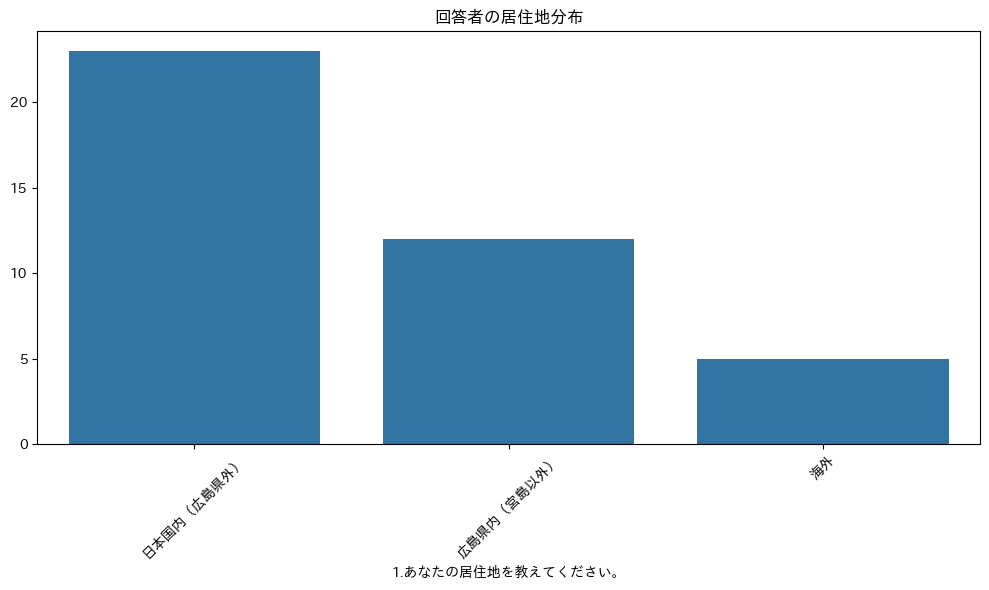

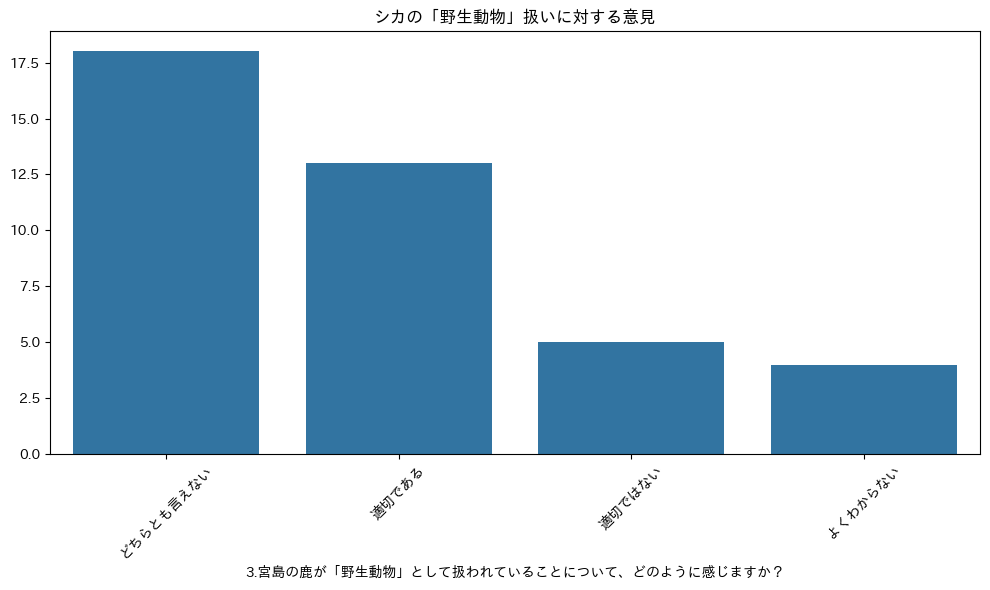

In [8]:
# 居住地の分布
plt.figure(figsize=(10, 6))
residence_counts = df['1.あなたの居住地を教えてください。'].value_counts()
sns.barplot(x=residence_counts.index, y=residence_counts.values)
plt.title('回答者の居住地分布')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('residence_distribution.png')
plt.show()

# 野生動物扱いに対する意見の分布
plt.figure(figsize=(10, 6))
wild_animal_counts = df['3.宮島の鹿が「野生動物」として扱われていることについて、どのように感じますか？'].value_counts()
sns.barplot(x=wild_animal_counts.index, y=wild_animal_counts.values)
plt.title('シカの「野生動物」扱いに対する意見')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('wild_animal_opinion.png')
plt.show()


この分析により、PDFに記載されていた「野生動物扱いに関する質問にはよくわからないという回答が多い」という結果を確認し、視覚化することができます1。

**クロス集計分析**<br>
次に、異なる質問間の関連性を調べるためのクロス集計分析を行います：

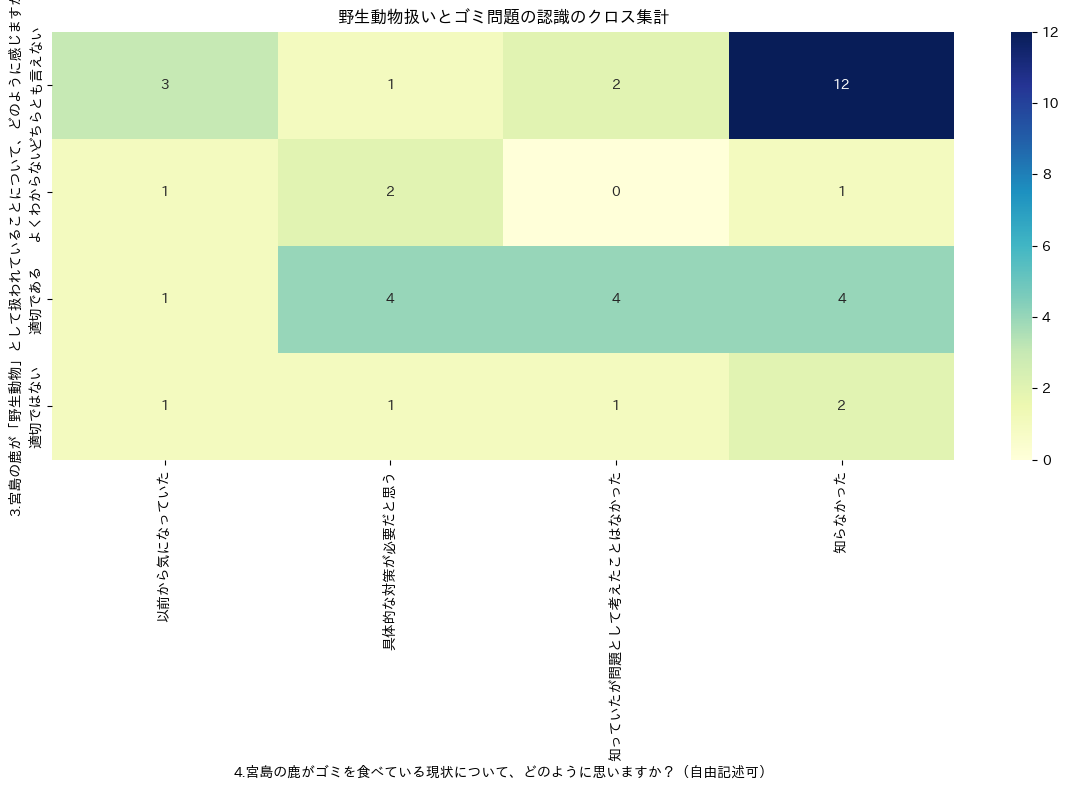

In [9]:
# シカの野生動物扱いに対する意見とゴミ問題への認識のクロス集計
cross_tab = pd.crosstab(
    df['3.宮島の鹿が「野生動物」として扱われていることについて、どのように感じますか？'],
    df['4.宮島の鹿がゴミを食べている現状について、どのように思いますか？（自由記述可）']
)

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('野生動物扱いとゴミ問題の認識のクロス集計')
plt.tight_layout()
plt.savefig('cross_tab_wild_garbage.png')
plt.show()


このクロス集計により、シカの「野生動物」扱いに対する意見と、ゴミを食べている現状に対する認識の関連性を視覚化することができます。PDFからわかるように、「具体的に対策を考えるべき」という意見が多いことがわかります1。




**テキストデータの分析**<br>
自由記述の回答には貴重な情報が含まれています。これらのテキストデータを分析するために、**自然言語処理の手法を活用**します：

In [26]:
!pip install janome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 52.0 MB/s eta 0:00:00


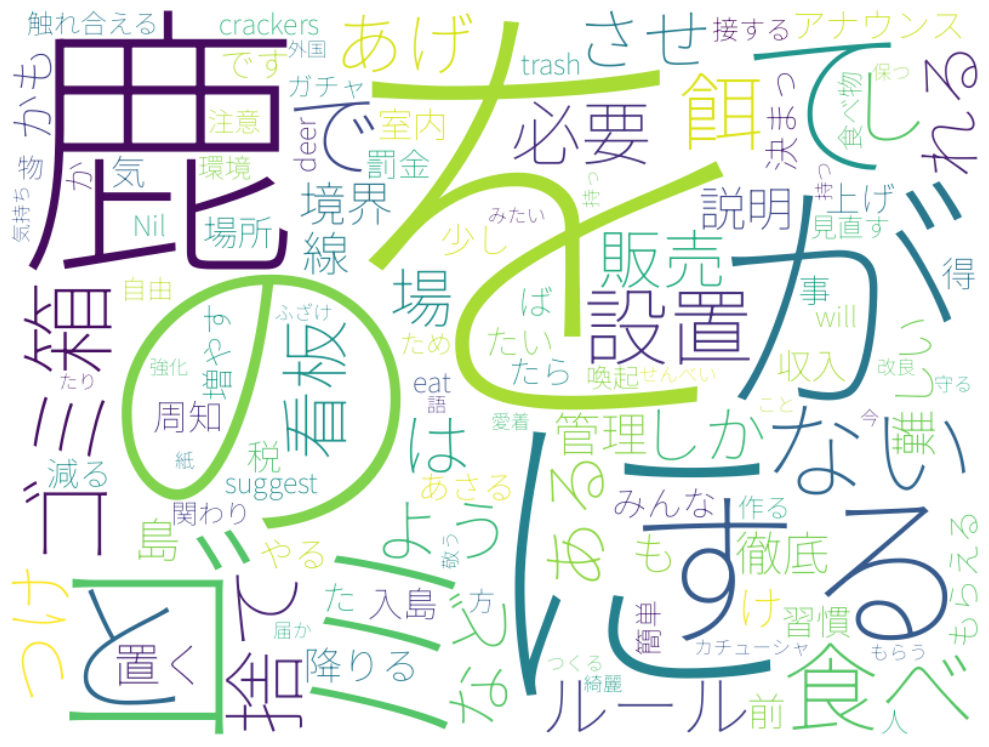

In [31]:
from janome.tokenizer import Tokenizer

def preprocess_text(text):
    if isinstance(text, str):
        # 記号や数字を削除
        text = re.sub(r'[^\w\s]', '', text)
        # Janomeによる形態素解析
        t = Tokenizer()
        tokens = [token.surface for token in t.tokenize(text)]
        return ' '.join(tokens)
    return ''

# 自由記述列のテキスト前処理
text_column = '7.宮島の鹿と人間がより良い関係を築くために、どのようなアイデアがあると思いますか？（自由記述）'
processed_texts = df[text_column].apply(preprocess_text)
all_text = ' '.join([text for text in processed_texts if text])

# ワードクラウドの生成
wordcloud = WordCloud(
    font_path='/content/NotoSansJP-VariableFont_wght.ttf',  # 適切なフォントパスに変更
    width=800,
    height=600,
    background_color='white'
).generate(all_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('idea_wordcloud.png')
plt.show()


このワードクラウド分析により、自由記述回答に頻出する単語を視覚化することができます。PDFから読み取れる主要な提案としては、「ゴミ箱を複数設置」「鹿とのルールを決め、島に降りる前にアナウンス」「鹿を敬う気持ちを持つ」などがあります1。

**クラスタリング分析による回答者分類**<br>
回答パターンに基づいて回答者をグループ化し、異なる意見グループを識別するためのクラスタリング分析を行います：

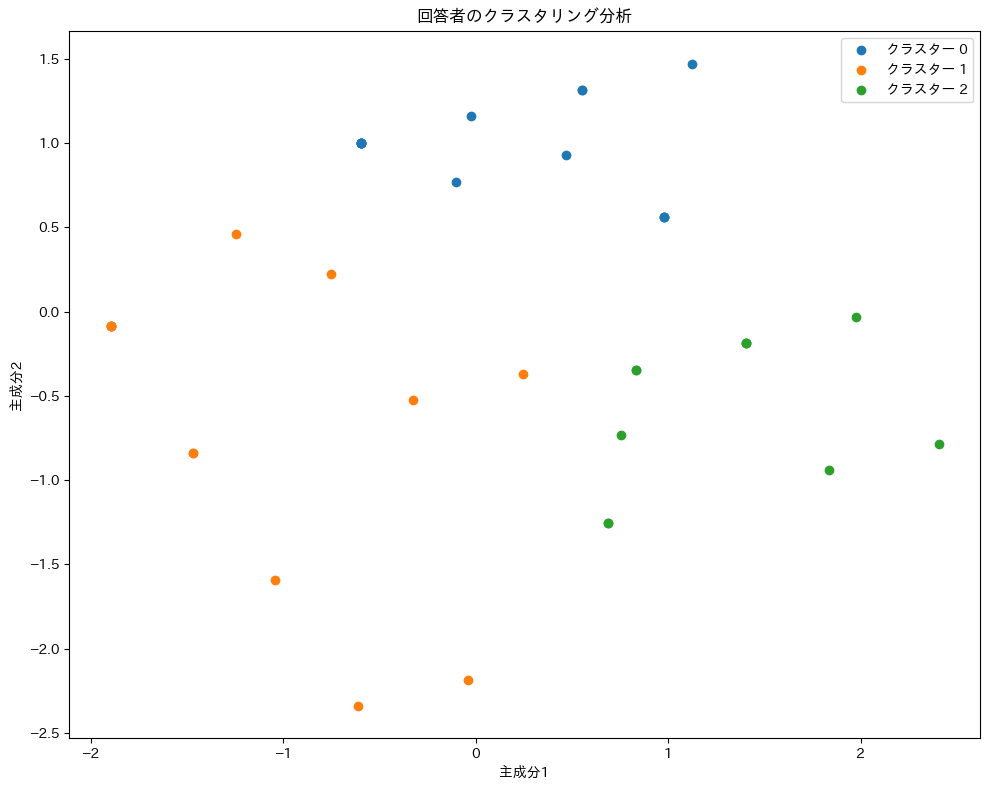

クラスター 0 の特徴:
  3.宮島の鹿が「野生動物」として扱われていることについて、どのように感じますか？:
3.宮島の鹿が「野生動物」として扱われていることについて、どのように感じますか？
適切である        6
どちらとも言えない    6
適切ではない       2
よくわからない      1
Name: count, dtype: int64
  4.宮島の鹿がゴミを食べている現状について、どのように思いますか？（自由記述可）:
4.宮島の鹿がゴミを食べている現状について、どのように思いますか？（自由記述可）
知らなかった                   12
知っていたが問題として考えたことはなかった     3
Name: count, dtype: int64
  5.宮島に奈良のように鹿せんべいを置くことについて、どう思いますか？:
5.宮島に奈良のように鹿せんべいを置くことについて、どう思いますか？
良いと思う（理由：____）      13
必要ないと思う（理由：____）     2
Name: count, dtype: int64


クラスター 1 の特徴:
  3.宮島の鹿が「野生動物」として扱われていることについて、どのように感じますか？:
3.宮島の鹿が「野生動物」として扱われていることについて、どのように感じますか？
どちらとも言えない    10
適切である         2
よくわからない       1
適切ではない        1
Name: count, dtype: int64
  4.宮島の鹿がゴミを食べている現状について、どのように思いますか？（自由記述可）:
4.宮島の鹿がゴミを食べている現状について、どのように思いますか？（自由記述可）
知らなかった                   7
知っていたが問題として考えたことはなかった    4
以前から気になっていた              2
具体的な対策が必要だと思う            1
Name: count, dtype: int64
  5.宮島に奈良のように鹿せんべいを置くことについて、どう思いますか？:
5.宮島に奈良のように鹿せんべいを置くことについて、どう思いますか？
どちらとも言えない           13

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# カテゴリデータの数値化
columns_to_encode = [
    '3.宮島の鹿が「野生動物」として扱われていることについて、どのように感じますか？',
    '4.宮島の鹿がゴミを食べている現状について、どのように思いますか？（自由記述可）',
    '5.宮島に奈良のように鹿せんべいを置くことについて、どう思いますか？'
]

df_encoded = df.copy()
encoders = {}

for column in columns_to_encode:
    if column in df.columns:
        encoders[column] = LabelEncoder()
        df_encoded[column] = encoders[column].fit_transform(df[column].fillna('未回答'))

# 数値化されたデータの標準化
features = df_encoded[columns_to_encode].values
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-meansクラスタリング
n_clusters = 3  # クラスター数は必要に応じて調整
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
df_encoded['cluster'] = clusters

# PCAで2次元に次元削減して可視化
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    plt.scatter(
        features_pca[clusters == cluster, 0],
        features_pca[clusters == cluster, 1],
        label=f'クラスター {cluster}'
    )
plt.title('回答者のクラスタリング分析')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.legend()
plt.tight_layout()
plt.savefig('respondent_clusters.png')
plt.show()

# 各クラスターの特徴を分析
for cluster in range(n_clusters):
    print(f"クラスター {cluster} の特徴:")
    for column in columns_to_encode:
        if column in df.columns:
            print(f"  {column}:")
            print(df[df_encoded['cluster'] == cluster][column].value_counts())
    print("\n")


このクラスタリング分析により、類似した回答パターンを持つ回答者グループを特定することができます。例えば、「環境保全派」「観光促進派」「伝統維持派」などのグループが形成される可能性があります。

**地理空間データの分析と可視化**<br>
回答者の居住地や宮島の地理的特性を考慮した分析も重要です。foliumライブラリを使用して地理空間データの可視化を行います：

In [36]:
import folium
from folium.plugins import HeatMap
import random

# 宮島の中心座標
miyajima_center = [34.2971, 132.3197]

# 居住地ごとの回答者数を集計
residence_counts = df['1.あなたの居住地を教えてください。'].value_counts()

# 仮想的な居住地座標（実際のデータでは緯度経度情報が必要）
residence_locations = {
    '広島県内（宮島以外）': [34.3853, 132.4553],
    '日本国内（広島県外）': [35.6895, 139.6917],
    '海外': [40.7128, -74.0060]
}

# 地図の作成
m = folium.Map(location=miyajima_center, zoom_start=8)

# 宮島の位置をマーク
folium.Marker(
    location=miyajima_center,
    popup='宮島',
    icon=folium.Icon(color='red')
).add_to(m)

# 居住地ごとの回答者数を可視化
for residence, count in residence_counts.items():
    if residence in residence_locations:
        folium.CircleMarker(
            location=residence_locations[residence],
            radius=count,
            color='blue',
            fill=True,
            fill_color='blue',
            popup=f'{residence}: {count}人'
        ).add_to(m)

# 仮想的なゴミ箱位置データ（実際のデータがあれば置き換え）
garbage_bin_locations = [
    [34.2971, 132.3197],
    [34.2960, 132.3220],
    [34.2950, 132.3230],
    [34.2980, 132.3180],
    [34.2990, 132.3190]
]

# ゴミ箱の位置をマッピング
for loc in garbage_bin_locations:
    folium.Marker(
        location=loc,
        popup='現在のゴミ箱',
        icon=folium.Icon(color='green', icon='trash')
    ).add_to(m)

# 提案するゴミ箱の追加位置
proposed_bins = [
    [34.2965, 132.3210],
    [34.2975, 132.3205],
    [34.2985, 132.3195],
    [34.2955, 132.3225],
    [34.2945, 132.3235]
]

for loc in proposed_bins:
    folium.Marker(
        location=loc,
        popup='提案するゴミ箱位置',
        icon=folium.Icon(color='blue', icon='trash')
    ).add_to(m)

# 地図を保存
m.save('miyajima_spatial_analysis.html')
m


この地理空間分析により、回答者の居住地分布とゴミ箱の現在の位置および提案する追加位置を視覚化することができます。PDFによると、ゴミ箱が少なすぎるという指摘があるため、適切な場所に追加のゴミ箱を設置することが提案されています1。

**解決策のシミュレーションと評価**<br>
アンケート結果から得られた情報をもとに、様々な解決策のシミュレーションを行い、その効果を予測します：

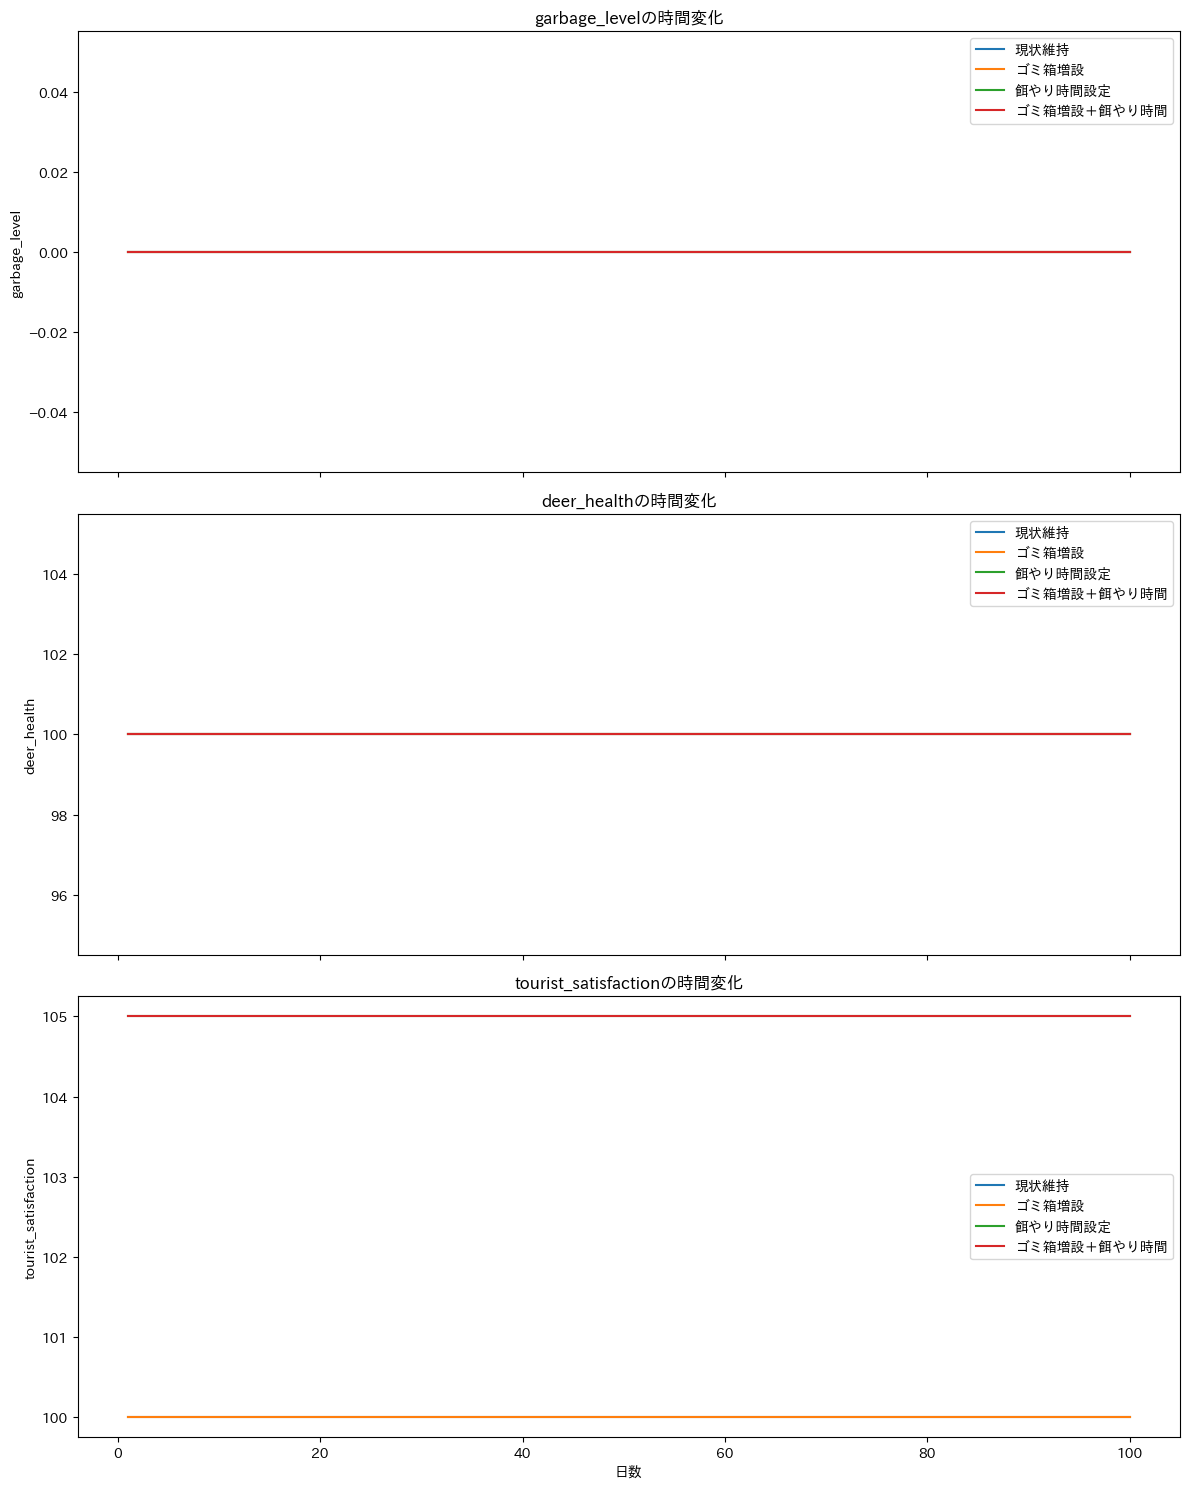

In [37]:
# 簡易的なシミュレーションモデル
class MiyajimaDeerSimulation:
    def __init__(self, num_deer=50, num_tourists=100, num_garbage_bins=5, feeding_time=False):
        self.num_deer = num_deer
        self.num_tourists = num_tourists
        self.num_garbage_bins = num_garbage_bins
        self.feeding_time = feeding_time
        self.garbage_level = 0
        self.deer_health = 100  # 100が最高
        self.tourist_satisfaction = 80  # 100が最高
        self.days = 0

    def simulate_day(self):
        # ゴミ発生
        self.garbage_level += 0.5 * self.num_tourists / self.num_garbage_bins

        # ゴミ箱の効果
        garbage_collected = min(self.garbage_level, self.num_garbage_bins * 10)
        self.garbage_level -= garbage_collected

        # 餌やり時間の効果
        if self.feeding_time:
            deer_eating_garbage = max(0, (self.garbage_level - 20) / self.num_deer)
        else:
            deer_eating_garbage = self.garbage_level / self.num_deer

        # シカの健康状態の変化
        if deer_eating_garbage > 0:
            self.deer_health -= 0.2 * deer_eating_garbage
        else:
            self.deer_health = min(100, self.deer_health + 1)

        # 観光客満足度の変化
        self.tourist_satisfaction = 80 + 0.2 * self.deer_health - 0.5 * self.garbage_level
        if self.feeding_time:
            self.tourist_satisfaction += 5  # 餌やり時間は観光客の満足度を上げる

        self.days += 1

        return {
            'days': self.days,
            'garbage_level': self.garbage_level,
            'deer_health': self.deer_health,
            'tourist_satisfaction': self.tourist_satisfaction
        }

# 異なるシナリオでシミュレーション
scenarios = [
    {'name': '現状維持', 'garbage_bins': 5, 'feeding_time': False},
    {'name': 'ゴミ箱増設', 'garbage_bins': 15, 'feeding_time': False},
    {'name': '餌やり時間設定', 'garbage_bins': 5, 'feeding_time': True},
    {'name': 'ゴミ箱増設＋餌やり時間', 'garbage_bins': 15, 'feeding_time': True}
]

results = {}
for scenario in scenarios:
    sim = MiyajimaDeerSimulation(
        num_garbage_bins=scenario['garbage_bins'],
        feeding_time=scenario['feeding_time']
    )

    scenario_results = []
    for _ in range(100):  # 100日間シミュレーション
        scenario_results.append(sim.simulate_day())

    results[scenario['name']] = pd.DataFrame(scenario_results)

# 結果の可視化
metrics = ['garbage_level', 'deer_health', 'tourist_satisfaction']
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 15), sharex=True)

for i, metric in enumerate(metrics):
    for scenario_name, df_result in results.items():
        axes[i].plot(df_result['days'], df_result[metric], label=scenario_name)

    axes[i].set_title(f'{metric}の時間変化')
    axes[i].set_ylabel(metric)
    axes[i].legend()

axes[-1].set_xlabel('日数')
plt.tight_layout()
plt.savefig('simulation_results.png')
plt.show()


このシミュレーションでは、ゴミ箱の数、餌やり時間の設定などの変数を使用して、異なる対策シナリオを比較しています。PDFに記載されている「ゴミ箱を複数設置し、決まった場所、決まった時間に鹿に餌をあげれる仕組みを作る」という提案の効果を検証することができます1。

**統計的分析と予測モデル**<br>
より高度な分析として、回答者の属性や意見に基づいて最適な解決策を予測する統計モデルを構築します：

In [39]:
print(df.columns)


Index(['タイムスタンプ', 'スコア', '1.あなたの居住地を教えてください。', '\n2.宮島にはどのくらいの頻度で訪れますか？',
       '3.宮島の鹿が「野生動物」として扱われていることについて、どのように感じますか？',
       '4.宮島の鹿がゴミを食べている現状について、どのように思いますか？（自由記述可）',
       '宮島の鹿がゴミを食べている現状について、どのように思いますか？（自由記述可）',
       '5.宮島に奈良のように鹿せんべいを置くことについて、どう思いますか？',
       '6.鹿のゴミ問題を解決するために、どのような対策が有効だと思いますか？（複数選択可）',
       '7.宮島の鹿と人間がより良い関係を築くために、どのようなアイデアがあると思いますか？（自由記述）',
       '5.宮島に奈良のように鹿せんべいを置くことについて、どう思いますか？それぞれの理由をこちらに記述してください。', '列 11'],
      dtype='object')


                              precision    recall  f1-score   support

ゴミ箱の設置場所を工夫する（鹿が届かない位置に設置など）       0.56      0.83      0.67         6
         観光客向けのゴミ捨てルールの周知を強化       0.50      0.25      0.33         4
              鹿が食べられる専用の餌を提供       0.00      0.00      0.00         2

                    accuracy                           0.50        12
                   macro avg       0.35      0.36      0.33        12
                weighted avg       0.44      0.50      0.44        12



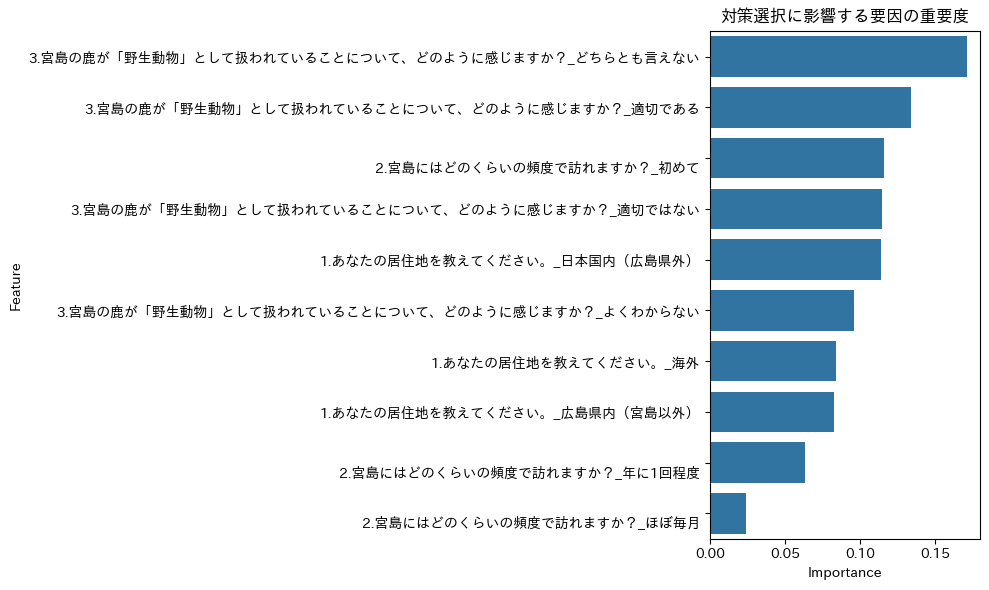

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 特徴量とターゲット変数の準備
# ターゲット変数：最も有効と思われる対策（6.鹿のゴミ問題を解決するために...）
# 特徴量：居住地、訪問頻度、野生動物扱いに対する意見など

# カテゴリカル変数のエンコーディング
feature_columns = [
    '1.あなたの居住地を教えてください。',
    '\n2.宮島にはどのくらいの頻度で訪れますか？',
    '3.宮島の鹿が「野生動物」として扱われていることについて、どのように感じますか？'
]

# ターゲット変数の準備
target_column = '6.鹿のゴミ問題を解決するために、どのような対策が有効だと思いますか？（複数選択可）'

# NaNを処理
df_model = df.copy()
for col in feature_columns:
    df_model[col] = df_model[col].fillna('未回答')

df_model[target_column] = df_model[target_column].fillna('未回答')

# エンコーディング
X_encoded = pd.get_dummies(df_model[feature_columns])
y = df_model[target_column]

# 複数選択可の場合は、最も一般的な回答を使用
y_encoded = pd.Series([response.split(',')[0] for response in y])

# トレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# ランダムフォレストモデルのトレーニング
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# モデルの評価
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 特徴量の重要度を可視化
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('対策選択に影響する要因の重要度')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()


この統計分析により、どのような属性や意見を持つ人がどのような対策を支持する傾向があるかを予測することができます。これにより、幅広い支持を得られる対策を特定することが可能になります。

**結論と提言**<br>
データ駆動型アプローチによる分析結果に基づき、宮島のシカと人間の共存に関する具体的な提言を行います。<br>

アンケート調査の結果、回答者の多くはシカがゴミを食べている現状に対して「具体的に対策を考えるべき」と考えており、「ゴミ箱の複数設置」「決まった場所と時間での餌やり」「観光客向けのルール周知」などの対策が提案されています1。<br>

クラスタリング分析やシミュレーション結果からは、複数の対策を組み合わせたアプローチが最も効果的であることが示唆されています。具体的には、以下の総合的な対策パッケージが推奨されます：<br>

ゴミ箱の増設と最適配置：現在の5箇所から15箇所程度に増やし、シカが届かない位置に設置することでゴミ問題を大幅に改善できます。<br>

定時・定点での餌やり制度の導入：決まった場所と時間でシカに適切な餌を与えることで、ゴミを食べる行動を減少させつつ、観光資源としても活用できます。<br>

観光客教育の強化：島に到着する前のアナウンスや多言語の看板設置を通じて、シカとの適切な関わり方やゴミ捨てルールを周知します。<br>

地域と観光客の協力体制：清掃活動を増やし、地域住民と観光客が協力して環境を守る意識を高めます。<br>

これらの対策を実施することで、シカの健康状態と観光客の満足度の両方を向上させ、持続可能な形での共存が可能になると考えられます。<br>さらに、提案した対策の効果を継続的にモニタリングし、データに基づいて改善していくことが重要です。<br>

このデータ駆動型アプローチは、今回の宮島のシカと人間の共存問題だけでなく、他の野生動物と人間の共存に関する課題にも応用できる可能性があります。<br>特に、観光地における野生動物保護と観光産業の両立という現代的な課題に対して、効果的な解決策を見出すための方法論として有用です。

**参考文献と使用ツール**<br>
今回の分析では、以下のPythonライブラリとツールを使用しました：<br>

pandas: データフレーム操作とデータ分析56<br>

matplotlib, seaborn: データ可視化3<br>

scikit-learn: 機械学習とクラスタリング6<br>

MeCab: 日本語テキスト処理<br>

folium: 地理空間データの可視化<br>

WordCloud: テキストデータの可視化<br>

これらのツールは、データの読み込み、前処理、分析、可視化のための効率的なワークフローを提供します356。<br>Pythonは特にデータサイエンスの分野で広く使用されており、その豊富なライブラリとツールにより、複雑なデータ分析タスクを比較的容易に実行することができます。<br>

本レポートで説明したアプローチやコード例は、データ駆動型理数探究のひとつのモデルケースとなり得るものであり、今後の研究や実践に応用していただければ幸いです